#### ACTIVITY 2 (PART 2 OF 2) – PROPERTIES AND APPLICATIONS OF THE 2D FOURIER TRANSFORM

Andeo, Lovely\
2020-05405\
FX-2

**Activity 2.2.1 Rotation Property of the FT**

1. Create a 2D sinusoid using MATLAB in the X direction (similar to a corrugated roof).
2. Rotate the sinusoid and take its FFT (be sure to FFTshift!). Discuss what happens to its FT.
3. Create a pattern which is a combination of sinusoids in X and Y and observe its FT. For example, the code below is a product of two corrugated roofs, one running in the X-direction, the other in Y.
4. Add several rotated sinusoids of different frequencies to the pattern in 3 and observe the FT.

**Output**

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import rotate
from scipy.fft import fft2, fftshift

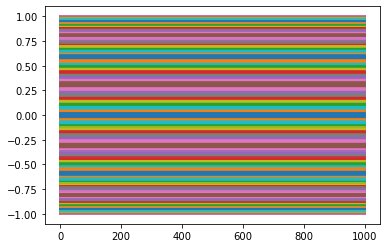

In [29]:
# Defining the parameters
amp1 = 1
wavelength1 = 10
freq1 = 2 * np.pi / wavelength1

# Creating the sinusoid
x = np.linspace(0, 100, 1000)
y = amp1 * np.sin(freq1 * x)
z = np.tile(y, (1000, 1))

# Plotting the 2D sinusoid
plt.plot(x, y, z)
plt.show()


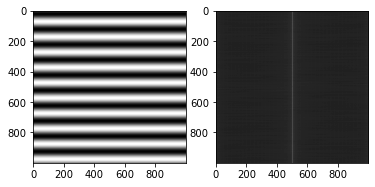

In [33]:
# Rotating the sinusoid by 90 degrees
z_rotated = rotate(z, angle=90, reshape=False)

# Taking its FFT
z_fft = fftshift(fft2(z_rotated))

# Plotting the rotated sinusoid and its FFT
fig, axs = plt.subplots(1, 2)
axs[0].imshow(z_rotated, cmap='gray')
axs[1].imshow(np.log(np.abs(z_fft)), cmap='gray')
plt.show()


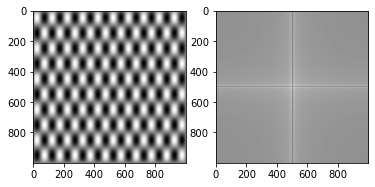

In [32]:
amp2 = 1
wavelength2 = 20
freq2 = 2 * np.pi / wavelength2

# Generating the arrays of X-axis and Y-axis values
x = np.linspace(0, 100, 1000)
y = np.linspace(0, 100, 1000)

# Creating 1D sinusoids in x and y
sin_x = amp1 * np.sin(freq1 * x)
sin_y = amp2 * np.sin(freq2 * y)

# Taking the other product to make it 2D
pattern = np.outer(sin_y, sin_x)

# Taking the FFT and shifting the zero frequency component to the center
pattern_fft = fftshift(fft2(pattern))

# Ploting the pattern and its FFT
fig, axs = plt.subplots(1, 2)
axs[0].imshow(pattern, cmap='gray')
axs[1].imshow(np.log(np.abs(pattern_fft)), cmap='gray')
plt.show()


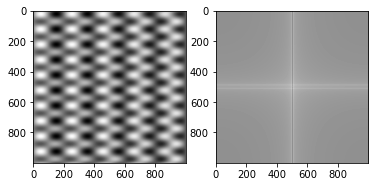

In [38]:
# Adding severak rotated sinusoid of diff frequencies
amp3 = 0.5
wavelength3 = 30
freq3 = 2 * np.pi / wavelength3
sin1 = amp3 * np.sin(freq3 * (x * np.cos(np.pi/4) + y * np.sin(np.pi/4)))

# Combining the sinusoids to create the new pattern
pattern = sin_x[:, np.newaxis] * sin_y[np.newaxis, :] + sin1

# Taking the FFT of the pattern and shift the zero frequency component to the center
pattern_fft = fftshift(fft2(pattern))

# Plotting the pattern and its FFT
fig, axs = plt.subplots(1, 2)
axs[0].imshow(pattern, cmap='gray')
axs[1].imshow(np.log(np.abs(pattern_fft)), cmap='gray')
plt.show()


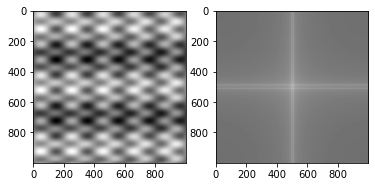

In [40]:
# Adding one more rotated sinusoid of diff frequencies
amp4 = 0.8
wavelength4 = 40
freq4 = 2 * np.pi / wavelength4
sin2 = amp4 * np.sin(freq4 * x)

# Combining the sinusoids to create the new pattern
pattern = sin_x[:, np.newaxis] * sin_y[np.newaxis, :] + sin1 + sin2[:, np.newaxis]

# Taking the FFT of the pattern and shift the zero frequency component to the center
pattern_fft = fftshift(fft2(pattern))

# Plotting the pattern and its FFT
fig, axs = plt.subplots(1, 2)
axs[0].imshow(pattern, cmap='gray')
axs[1].imshow(np.log(np.abs(pattern_fft)), cmap='gray')
plt.show()


**Activity 2.2.2 Application: Canvas Weave Modeling and Removal**

1. Open the image 185-8526.jpg and convert into a grayscale image. To enhance the detec- tion of repeating patterns we first subtract the mean grayscale from the image. This will remove the DC bias of intensity images. The image is from a painting by Dr. Vincent Daria.
2. Take the FT of the mean-subtracted image and take note of the symmetric peaks. These are the sinusoids that make up the canvas weave image, similar to the rotation property of sinusoids we did earlier.
3. Manually create a filter mask in the FT space to remove the canvas weave patterns. This is a ma- trix which is the same size as the image. The filter is all 1’s but are zero at the locations of the sinusoidal peaks. FFT shift this filter and multiply this to the complex FT of the Red, Green and Blue channels of the original image (not mean subtracted). The filter essentially “erases” the peaks . Take the inverse FT of the filtered FT and overlay the filtered R,G,B images . Did the can- vas weave vanish enough that the paint and brushstrokes remain?
4. Invert the filter mask (0's become 1's and vice versa) and take the inverse Fourier transform. Ob- serve the generated modulus image. Is it close to the appearance of the canvas weave?


**Extra Challenge 1**
Look for a material that has repeating texture and on top of it is a print, for example, ecobags with super- market logos, t-shirt with a brand, etc. Capture an image of the material with print or logo and filter out the texture. The resulting image should just be the print or logo.

**Extra Challenge 2**
Kaketsugi is the Japanese are of invisible mending. To repair a hole in a garment, a piece of fabric from the same garment is cut and patched onto the hole by painstakingly weaving the fabric into the hole fol- lowing the weave pattern of the cloth. Watch this youtube video to appreciate the art. Practitioners study the weaving pattern of different fabrics to inform the excution of their craft. Take a close-up image of a piece of fabric and take its FT. Filter out everything except the peaks corresponding to the weave pat- terns. Take the inverse FT of the filtered image. Does it look like an enhanced version of the weave pat- tern?

Convolving the two images (aperture with 10% of the array width)

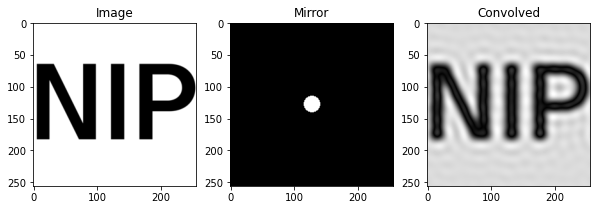

In [61]:
# Opening and converting the image to grayscale
Img = Image.open('2.2.tiff').convert('L') 
Img_array = np.array(Img)

# Creating the aperture
B = Image.new('RGB', (256, 256), color='black')
draw = ImageDraw.Draw(B)

d = 256 * 0.1 # diameter 
c = (256 / 2, 256 / 2) # center
# Draw the circle in white
draw.ellipse((c[0]-d/2, c[1]-d/2, c[0]+d/2, c[1]+d/2), fill='white')
Aper = B.convert('L')
Aper_array = np.array(Aper)

# Convolving the images
G = np.fft.fftshift(Aper_array)
F = np.fft.fft2(Img_array)
H = G*F
h = np.fft.ifft2(H)

# Displaying the output

# Creating a figure with three subplots arranged horizontally
fig, ax = plt.subplots(1, 3, figsize=(10, 3))

# Displaying the NIP image in the first subplot
ax[0].imshow(Img_array, cmap='gray')
ax[0].set_title('Image')

# Displaying the aperture in the second subplot
ax[1].imshow(Aper_array, cmap='gray')
ax[1].set_title('Mirror')

# Displaying the convolved image in the third subplot
ax[2].imshow(abs(h), cmap='gray')
ax[2].set_title('Convolved')

# Show the figure
plt.show()

Convolving the two images (aperture with 25% of the array width)

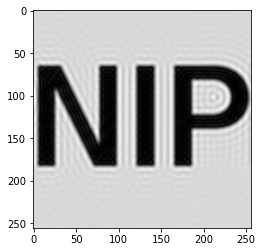

In [10]:
# Creating the aperture with 25%
B25 = Image.new('RGB', (256, 256), color='black')
draw = ImageDraw.Draw(B25)
d = 256 * 0.25 
c = (256 / 2, 256 / 2) 
draw.ellipse((c[0]-d/2, c[1]-d/2, c[0]+d/2, c[1]+d/2), fill='white')
Aper25 = B25.convert('L')
Aper25_array = np.array(Aper25)

# Convolving the images
G25 = np.fft.fftshift(Aper25_array)
F25 = np.fft.fft2(Img_array)
H25 = G25*F25
h25 = np.fft.ifft2(H25)

plt.imshow(abs(h25), cmap="gray")

Convolving the two images (aperture with 50% of the array width)

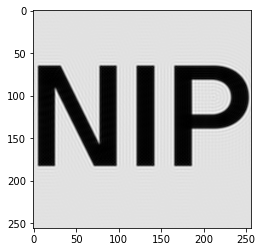

In [11]:
# Creating the aperture with 50%
B50 = Image.new('RGB', (256, 256), color='black')
draw = ImageDraw.Draw(B50)
d = 256 * 0.50 
c = (256 / 2, 256 / 2) 
draw.ellipse((c[0]-d/2, c[1]-d/2, c[0]+d/2, c[1]+d/2), fill='white')
Aper50 = B50.convert('L')
Aper50_array = np.array(Aper50)

# Convolving the images
G50 = np.fft.fftshift(Aper50_array)
F50 = np.fft.fft2(Img_array)
H50 = G50*F50
h50 = np.fft.ifft2(H50)

plt.imshow(abs(h50), cmap="gray")

Convolving the two images (aperture with 75% of the array width)

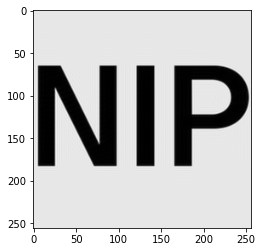

In [12]:
# Creating the aperture with 75%
B75 = Image.new('RGB', (256, 256), color='black')
draw = ImageDraw.Draw(B75)
d = 256 * 0.75 
c = (256 / 2, 256 / 2) 
draw.ellipse((c[0]-d/2, c[1]-d/2, c[0]+d/2, c[1]+d/2), fill='white')
Aper75 = B75.convert('L')
Aper75_array = np.array(Aper75)

# Convolving the images
G75 = np.fft.fftshift(Aper75_array)
F75 = np.fft.fft2(Img_array)
H75 = G75*F75
h75 = np.fft.ifft2(H75)

plt.imshow(abs(h75), cmap="gray")

Convolving the two images (aperture with 100% of the array width)

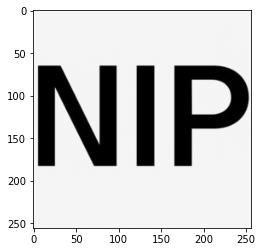

In [13]:
# Creating the aperture with 75%
B100 = Image.new('RGB', (256, 256), color='black')
draw = ImageDraw.Draw(B100)
d = 256 * 1.0
c = (256 / 2, 256 / 2) 
draw.ellipse((c[0]-d/2, c[1]-d/2, c[0]+d/2, c[1]+d/2), fill='white')
Aper100 = B100.convert('L')
Aper100_array = np.array(Aper100)

# Convolving the images
G100 = np.fft.fftshift(Aper100_array)
F100 = np.fft.fft2(Img_array)
H100 = G100*F100
h100 = np.fft.ifft2(H100)

plt.imshow(abs(h100), cmap="gray")

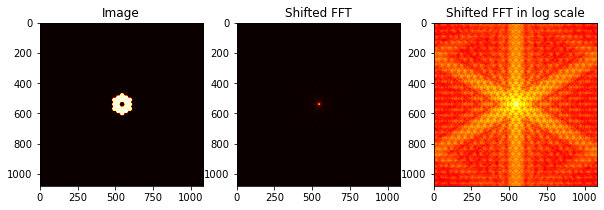

In [29]:
# Loading honeycomb image and converting to grayscale
img = Image.open('jwst.png').convert('L')
arr = np.array(img)

# Calculating Fourier transform and shifting zero-frequency component to center
arr_fft = np.fft.fft2(arr)
arr_fft_shifted = np.fft.fftshift(abs(arr_fft))

# Displaying the output

# Creating a figure with three subplots arranged horizontally
fig, ax = plt.subplots(1, 3, figsize=(10, 3))

# Displaying the jwst in the first subplot
ax[0].imshow(arr, cmap='hot')
ax[0].set_title('Image')

# Displaying the shifted dft in the second subplot
ax[1].imshow(arr_fft_shifted, cmap='hot')
ax[1].set_title('Shifted FFT')

# Displaying the shifted dft in log scale in the third subplot
ax[2].imshow(np.log(arr_fft_shifted), cmap='hot')
ax[2].set_title('Shifted FFT in log scale')

plt.show()

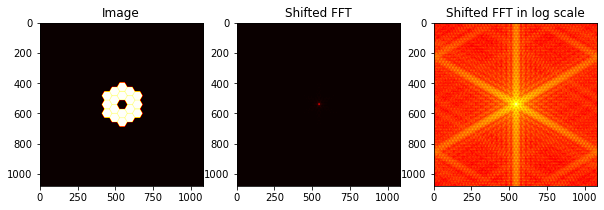

In [28]:
# Loading honeycomb image and converting to grayscale
img = Image.open('jwst3.png').convert('L')
arr = np.array(img)

# Calculating Fourier transform and shifting zero-frequency component to center
arr_fft = np.fft.fft2(arr)
arr_fft_shifted = np.fft.fftshift(abs(arr_fft))

# Displaying the output

# Creating a figure with three subplots arranged horizontally
fig, ax = plt.subplots(1, 3, figsize=(10, 3))

# Displaying the jwst in the first subplot
ax[0].imshow(arr, cmap='hot')
ax[0].set_title('Image')

# Displaying the shifted dft in the second subplot
ax[1].imshow(arr_fft_shifted, cmap='hot')
ax[1].set_title('Shifted FFT')

# Displaying the shifted dft in log scale in the third subplot
ax[2].imshow(np.log(arr_fft_shifted), cmap='hot')
ax[2].set_title('Shifted FFT in log scale')

plt.show()

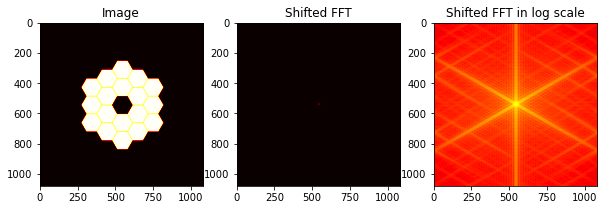

In [27]:
# Loading honeycomb image and converting to grayscale
img = Image.open('jwst2.png').convert('L')
arr = np.array(img)

# Calculating Fourier transform and shifting zero-frequency component to center
arr_fft = np.fft.fft2(arr)
arr_fft_shifted = np.fft.fftshift(abs(arr_fft))

# Displaying the output

# Creating a figure with three subplots arranged horizontally
fig, ax = plt.subplots(1, 3, figsize=(10, 3))

# Displaying the jwst in the first subplot
ax[0].imshow(arr, cmap='hot')
ax[0].set_title('Image')

# Displaying the shifted dft in the second subplot
ax[1].imshow(arr_fft_shifted, cmap='hot')
ax[1].set_title('Shifted FFT')

# Displaying the shifted dft in log scale in the third subplot
ax[2].imshow(np.log(arr_fft_shifted), cmap='hot')
ax[2].set_title('Shifted FFT in log scale')

plt.show()

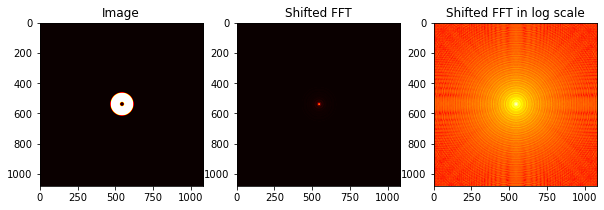

In [26]:
# Loading honeycomb image and converting to grayscale
img = Image.open('hubble1.png').convert('L')
arr = np.array(img)

# Calculating Fourier transform and shifting zero-frequency component to center
arr_fft = np.fft.fft2(arr)
arr_fft_shifted = np.fft.fftshift(abs(arr_fft))

# Displaying the output

# Creating a figure with three subplots arranged horizontally
fig, ax = plt.subplots(1, 3, figsize=(10, 3))

# Displaying the hubble in the first subplot
ax[0].imshow(arr, cmap='hot')
ax[0].set_title('Image')

# Displaying the shifted dft in the second subplot
ax[1].imshow(arr_fft_shifted, cmap='hot')
ax[1].set_title('Shifted FFT')

# Displaying the shifted dft in log scale in the third subplot
ax[2].imshow(np.log(arr_fft_shifted), cmap='hot')
ax[2].set_title('Shifted FFT in log scale')

plt.show()

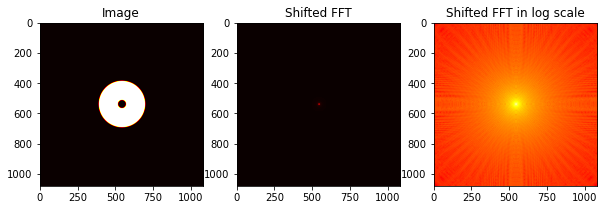

In [25]:
# Loading honeycomb image and converting to grayscale
img = Image.open('hubble2.png').convert('L')
arr = np.array(img)

# Calculating Fourier transform and shifting zero-frequency component to center
arr_fft = np.fft.fft2(arr)
arr_fft_shifted = np.fft.fftshift(abs(arr_fft))

# Displaying the output

# Creating a figure with three subplots arranged horizontally
fig, ax = plt.subplots(1, 3, figsize=(10, 3))

# Displaying the hubble in the first subplot
ax[0].imshow(arr, cmap='hot')
ax[0].set_title('Image')

# Displaying the shifted dft in the second subplot
ax[1].imshow(arr_fft_shifted, cmap='hot')
ax[1].set_title('Shifted FFT')

# Displaying the shifted dft in log scale in the third subplot
ax[2].imshow(np.log(arr_fft_shifted), cmap='hot')
ax[2].set_title('Shifted FFT in log scale')

plt.show()

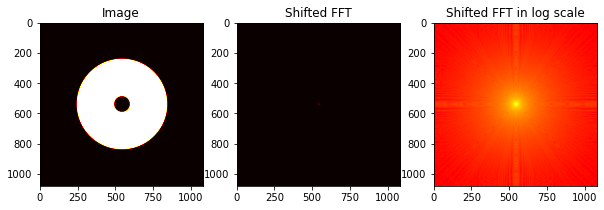

In [24]:
# Loading honeycomb image and converting to grayscale
img = Image.open('hubble3.png').convert('L')
arr = np.array(img)

# Calculating Fourier transform and shifting zero-frequency component to center
arr_fft = np.fft.fft2(arr)
arr_fft_shifted = np.fft.fftshift(abs(arr_fft))

# Displaying the output

# Creating a figure with three subplots arranged horizontally
fig, ax = plt.subplots(1, 3, figsize=(10, 3))

# Displaying the hubble in the first subplot
ax[0].imshow(arr, cmap='hot')
ax[0].set_title('Image')

# Displaying the shifted dft in the second subplot
ax[1].imshow(arr_fft_shifted, cmap='hot')
ax[1].set_title('Shifted FFT')

# Displaying the shifted dft in log scale in the third subplot
ax[2].imshow(np.log(arr_fft_shifted), cmap='hot')
ax[2].set_title('Shifted FFT in log scale')

plt.show()

Additional: I am curious to see what would happen if I convolve the the JWST mirror with a sky image.

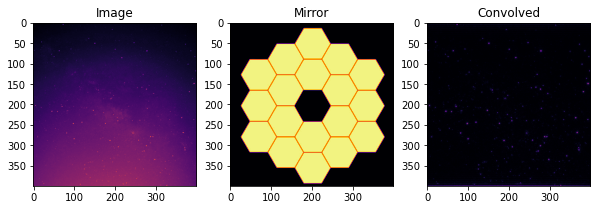

In [16]:
# Opening and converting the sky image to grayscale
Img = Image.open('sky.jpg').convert('L') 
Img_array = np.array(Img.resize((400,400)))

# Opening and converting the mirror image to grayscale
Aper = Image.open('jwst1.png').convert('L')
Aper_array = np.array(Aper.resize((400,400)))
Aper

# Convoling the images
G = np.fft.fftshift(Aper_array)
F = np.fft.fft2(Img_array)
H = G*F
h = np.fft.ifft2(H)

# Displaying the output

# Creating a figure with three subplots arranged horizontally
fig, ax = plt.subplots(1, 3, figsize=(10, 3))

# Displaying the sky image in the first subplot
ax[0].imshow(Img_array, cmap='inferno')
ax[0].set_title('Image')

# Displaying the jwst aperture in the second subplot
ax[1].imshow(Aper_array, cmap='inferno')
ax[1].set_title('Mirror')

# Displaying the convolved image in the third subplot
ax[2].imshow(abs(h), cmap='inferno')
ax[2].set_title('Convolved')

# Show the figure
plt.show()


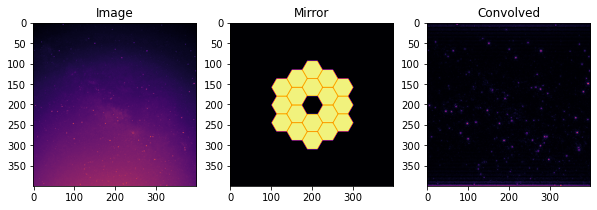

In [17]:
# Opening and converting the sky image to grayscale
Img = Image.open('sky.jpg').convert('L') 
Img_array = np.array(Img.resize((400,400)))

# Opening and converting the mirror image to grayscale
Aper = Image.open('jwst2.png').convert('L')
Aper_array = np.array(Aper.resize((400,400)))
Aper

# Convoling the images
G = np.fft.fftshift(Aper_array)
F = np.fft.fft2(Img_array)
H = G*F
h = np.fft.ifft2(H)

# Displaying the output

# Creating a figure with three subplots arranged horizontally
fig, ax = plt.subplots(1, 3, figsize=(10, 3))

# Displaying the sky image in the first subplot
ax[0].imshow(Img_array, cmap='inferno')
ax[0].set_title('Image')

# Displaying the jwst aperture in the second subplot
ax[1].imshow(Aper_array, cmap='inferno')
ax[1].set_title('Mirror')

# Displaying the convolved image in the third subplot
ax[2].imshow(abs(h), cmap='inferno')
ax[2].set_title('Convolved')

# Show the figure
plt.show()


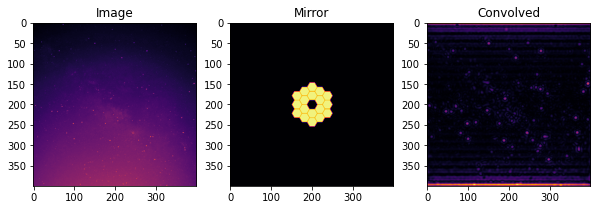

In [18]:
# Opening and converting the sky image to grayscale
Img = Image.open('sky.jpg').convert('L') 
Img_array = np.array(Img.resize((400,400)))

# Opening and converting the mirror image to grayscale
Aper = Image.open('jwst3.png').convert('L')
Aper_array = np.array(Aper.resize((400,400)))
Aper

# Convoling the images
G = np.fft.fftshift(Aper_array)
F = np.fft.fft2(Img_array)
H = G*F
h = np.fft.ifft2(H)

# Displaying the output

# Creating a figure with three subplots arranged horizontally
fig, ax = plt.subplots(1, 3, figsize=(10, 3))

# Displaying the sky image in the first subplot
ax[0].imshow(Img_array, cmap='inferno')
ax[0].set_title('Image')

# Displaying the jwst aperture in the second subplot
ax[1].imshow(Aper_array, cmap='inferno')
ax[1].set_title('Mirror')

# Displaying the convolved image in the third subplot
ax[2].imshow(abs(h), cmap='inferno')
ax[2].set_title('Convolved')

# Show the figure
plt.show()


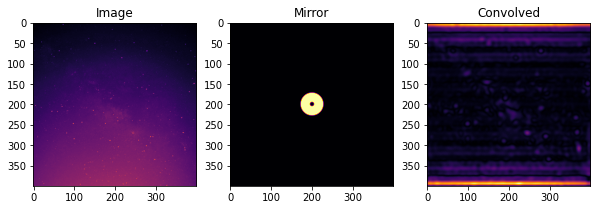

In [101]:
# Opening and converting the sky image to grayscale
Img = Image.open('sky.jpg').convert('L') 
Img_array = np.array(Img.resize((400,400)))

# Opening and converting the mirror image to grayscale
Aper = Image.open('hubble.png').convert('L')
Aper_array = np.array(Aper.resize((400,400)))
Aper

# Convoling the images
G = np.fft.fftshift(Aper_array)
F = np.fft.fft2(Img_array)
H = G*F
h = np.fft.ifft2(H)

# Displaying the output

# Creating a figure with three subplots arranged horizontally
fig, ax = plt.subplots(1, 3, figsize=(10, 3))

# Displaying the sky image in the first subplot
ax[0].imshow(Img_array, cmap='inferno')
ax[0].set_title('Image')

# Displaying the hubble aperture in the second subplot
ax[1].imshow(Aper_array, cmap='inferno')
ax[1].set_title('Mirror')

# Displaying the convolved image in the third subplot
ax[2].imshow(abs(h), cmap='inferno')
ax[2].set_title('Convolved')

# Show the figure
plt.show()


**Activity 2.2.3. Convolution Theorem Redux**

1. Create a binary image of two dots (one pixel each) along the x-axis symmetric about center. Take the FT and display the modulus.
2. Replace the dots with circles of some radius. Discuss what you observe in the FT modulus as you vary the radius.
3. Replace the dots with squares of some width. Discuss what you observe in the FT modulus as you vary the width.
4. Create a 200×200 array of zeros. Put 10 1's in random locations in the array. These ones will ap- proximate dirac deltas. Call this array A. Create an arbitrary 9×9 pattern, call it d. Convolve A and d. What do you observe?
5. Create another 200×200 array of zeros but this time put equally spaced 1's along the x- and y-axis in the array. Get the FT and display the modulus. Change the spacing the 1's and repeat. Explain what you observe.

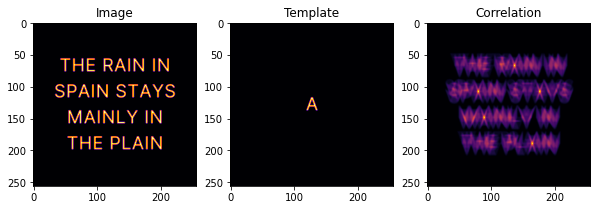

In [19]:
# Loading and converting the phrase image
phrase0 = Image.open('phrase.png').convert('L') # converting the imager to grayscale
phrase = phrase0.resize((256,256)) # bec it was saved as 1080 x 1080
phrase_array = np.array(phrase)
phrase

# Loading and converting the letter a image
letterA0 = Image.open('letterA.png').convert('L') # converting the imager to grayscale
letterA = letterA0.resize((256,256))
letterA_array = np.array(letterA)
letterA

# Matching
Fphrase = np.fft.fft2(phrase_array)
FletterA = np.fft.fft2(letterA_array)
P = np.conj(FletterA)*Fphrase #FImg is complex FFT2 of the phrase image #Again just use one channel
smallp = np.fft.ifft2(P) 
corr = np.fft.fftshift(abs(smallp))

# Displaying the output

# Creating a figure with three subplots arranged horizontally
fig, ax = plt.subplots(1, 3, figsize=(10, 3))

# Displaying the phrase in the first subplot
ax[0].imshow(phrase, cmap='inferno')
ax[0].set_title('Image')

# Displaying the template in the second subplot
ax[1].imshow(letterA, cmap='inferno')
ax[1].set_title('Template')

# Displaying the correlated image in the third subplot
ax[2].imshow(corr, cmap='inferno')
ax[2].set_title('Correlation')

# Show the figure
plt.show()

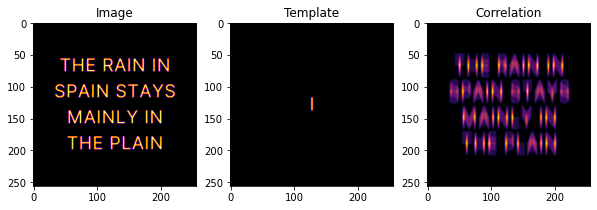

In [20]:
# Loading and converting the phrase image
phrase0 = Image.open('phrase.png').convert('L') # converting the imager to grayscale
phrase = phrase0.resize((256,256)) # bec it was saved as 1080 x 1080
phrase_array = np.array(phrase)

# Loading and converting the letter a image
letterI0 = Image.open('letterI.png').convert('L') # converting the imager to grayscale
letterI = letterI0.resize((256,256))
letterI_array = np.array(letterI)

# Matching
Fphrase = np.fft.fft2(phrase_array)
FletterI = np.fft.fft2(letterI_array)
P = np.conj(FletterI)*Fphrase #FImg is complex FFT2 of the phrase image #Again just use one channel
smallp = np.fft.ifft2(P) 
corr = np.fft.fftshift(abs(smallp))

# Displaying the output

# Creating a figure with three subplots arranged horizontally
fig, ax = plt.subplots(1, 3, figsize=(10, 3))

# Displaying the phrase in the first subplot
ax[0].imshow(phrase, cmap='inferno')
ax[0].set_title('Image')

# Displaying the template in the second subplot
ax[1].imshow(letterI, cmap='inferno')
ax[1].set_title('Template')

# Displaying the correlated image in the third subplot
ax[2].imshow(corr, cmap='inferno')
ax[2].set_title('Correlation')

# Show the figure
plt.show()

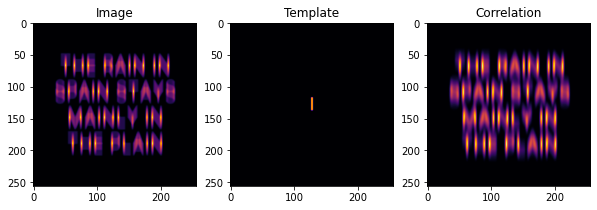

In [22]:
corr_array = np.fft.fftshift(abs(smallp))

# Loading and converting the letter a image
letterI0 = Image.open('letterI.png').convert('L') # converting the imager to grayscale
letterI = letterI0.resize((256,256))
letterI_array = np.array(letterI)

# Matching
Fcorr = np.fft.fft2(corr_array)
FletterI = np.fft.fft2(letterI_array)
P = np.conj(FletterI)*Fcorr #FImg is complex FFT2 of the phrase image #Again just use one channel
smallp = np.fft.ifft2(P) 
corr1 = np.fft.fftshift(abs(smallp))


# Creating a figure with three subplots arranged horizontally
fig, ax = plt.subplots(1, 3, figsize=(10, 3))

# Displaying the first correlated image in the first subplot
ax[0].imshow(corr, cmap='inferno')
ax[0].set_title('Image')

# Displaying the same template in the second subplot
ax[1].imshow(letterI, cmap='inferno')
ax[1].set_title('Template')

# Displaying the first correlated image in the third subplot
ax[2].imshow(corr1, cmap='inferno')
ax[2].set_title('Correlation')

# Show the figure
plt.show()

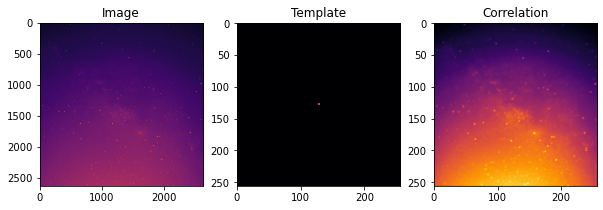

In [23]:
# Loading and converting the sky image
image = Image.open('sky.jpg').convert('L') # converting the imager to grayscale
image1 = image.resize((256,256)) # bec it was saved as 1080 x 1080
image_array = np.array(image1)

# Loading and converting the circle image
circ = Image.open('dot.png').convert('L') # converting the imager to grayscale
circle = circ.resize((256,256))
circle_array = np.array(circle)

# Matching
Fimage = np.fft.fft2(image_array)
Fcircle = np.fft.fft2(circle_array)
P = np.conj(Fcircle)*Fimage #FImg is complex FFT2 of the phrase image #Again just use one channel
smallp = np.fft.ifft2(P) 
corr = np.fft.fftshift(abs(smallp))

# Displaying the output

# Creating a figure with three subplots arranged horizontally
fig, ax = plt.subplots(1, 3, figsize=(10, 3))

# Displaying the same sky image in the first subplot
ax[0].imshow(image, cmap='inferno')
ax[0].set_title('Image')

# Displaying the dot template in the second subplot
ax[1].imshow(circle, cmap='inferno')
ax[1].set_title('Template')

# Displaying the correlated image in the third subplot
ax[2].imshow(corr, cmap='inferno')
ax[2].set_title('Correlation')

# Show the figure
plt.show()

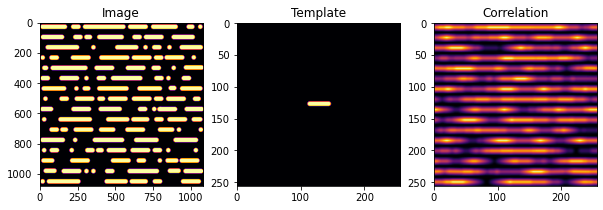

In [24]:
# Loading and converting the sky image
image = Image.open('pattern.png').convert('L') # converting the imager to grayscale
image1 = image.resize((256,256)) # bec it was saved as 1080 x 1080
image_array = np.array(image1)

# Loading and converting the circle image
circ = Image.open('pattern_template.png').convert('L') # converting the imager to grayscale
circle = circ.resize((256,256))
circle_array = np.array(circle)

# Matching
Fimage = np.fft.fft2(image_array)
Fcircle = np.fft.fft2(circle_array)
P = np.conj(Fcircle)*Fimage #FImg is complex FFT2 of the phrase image #Again just use one channel
smallp = np.fft.ifft2(P) 
corr = np.fft.fftshift(abs(smallp))

# Displaying the output

# Creating a figure with three subplots arranged horizontally
fig, ax = plt.subplots(1, 3, figsize=(10, 3))

# Displaying the pattern in the first subplot
ax[0].imshow(image, cmap='inferno')
ax[0].set_title('Image')

# Displaying the template in the second subplot
ax[1].imshow(circle, cmap='inferno')
ax[1].set_title('Template')

# Displaying the correlated image in the third subplot
ax[2].imshow(corr, cmap='inferno')
ax[2].set_title('Correlation')

# Show the figure
plt.show()

**Activity 2.2.4 Fingerprints : Ridge Enhancement**

1. Prepare an image of your own fingerprint in grayscale. You may do this by taking a picture of your stamped-ink fingerprint on paper. If you fail to prepare your own fingerprint, download grayscale images from the web. Make sure the image is NOT YET BINARIZED like the figure below. Remember to cite your sources, like Examples of different classes of fingerprints. (a) right loop (b) whorl... | Download Scientific Diagram (researchgate.net).
2. Open ithe image as grayscale and mean-center the grayvalues of the image.
3. Obtain the FT of the mean-centered grayscale image and investigate where the frequencies of the fingerprint ridges lie. Tip: The modulus of the FT image might span several orders of magnitude sp use the log scale to display the FT image.
4. Explain why the FT of fingerprints look the way they do.

**Activity 2.2.5 Lunar Landing Scanned Pictures : Line removal**

1. Download the image below from the website: 5. Apollo 11 site: High resolution vertical view (usra.edu)
2. Remove the vertical lines in the image by filtering in the Fourier Domain.